In [1]:
print("      ")

Description: The dataset used for predictive modelling was generated by the Wild Blueberry Pollination Simulation Model, which is an open-source, spatially-explicit computer simulation program, that enables exploration of how various factors, including plant spatial arrangement, outcrossing and self-pollination, bee species compositions and weather conditions, in isolation and combination, affect pollination efficiency and yield of the wild blueberry agro-ecosystem. The simulation model has been validated by the field observation and experimental data collected in Maine USA and Canadian Maritimes during the last 30 years and now is a useful tool for hypothesis testing and theory development for wild blueberry pollination researches. This simulated data provides researchers who have actual data collected from field observation and those who wants to experiment the potential of machine learning algorithms response to real data and computer simulation modelling generated data as input for crop yield prediction models.

#### Import required libraries

In [179]:
#Data pre-processing
import pandas as pd
import numpy as np

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

#Pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score

#Feature slection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

#Stats
from scipy import stats

#Models
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression

#Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Misc
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Import the data set

In [5]:
train = pd.read_csv('./WildBlueberryPollinationSimulationData.csv')
print(f"Number of data points {train.shape[0]}")
print(f"Number of features    {train.shape[1]}")

Number of data points 777
Number of features    18


In [6]:
print("Number of columns: {}".format(len(train.columns)))
print('\n')
print(train.columns)

Number of columns: 18


Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')


#### Stats on features

In [8]:
train.dtypes

Row#                      int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Row#,777.0,388.000000,224.444871,0.000000,194.000000,388.000000,582.000000,776.000000
clonesize,777.0,18.767696,6.999063,10.000000,12.500000,12.500000,25.000000,40.000000
honeybee,777.0,0.417133,0.978904,0.000000,0.250000,0.250000,0.500000,18.430000
bumbles,777.0,0.282389,0.066343,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,777.0,0.468817,0.161052,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,777.0,0.562062,0.169119,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,777.0,82.277091,9.193745,69.700000,77.400000,86.000000,89.000000,94.600000
MinOfUpperTRange,777.0,49.700515,5.595769,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,777.0,68.723037,7.676984,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,777.0,59.309395,6.647760,50.200000,55.800000,62.000000,66.000000,68.200000


In [11]:
train.isnull().mean()

Row#                    0.0
clonesize               0.0
honeybee                0.0
bumbles                 0.0
andrena                 0.0
osmia                   0.0
MaxOfUpperTRange        0.0
MinOfUpperTRange        0.0
AverageOfUpperTRange    0.0
MaxOfLowerTRange        0.0
MinOfLowerTRange        0.0
AverageOfLowerTRange    0.0
RainingDays             0.0
AverageRainingDays      0.0
fruitset                0.0
fruitmass               0.0
seeds                   0.0
yield                   0.0
dtype: float64

In [12]:
train[train.duplicated()]

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield


In [40]:
train.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [41]:
train.nunique()

Row#                    777
clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

* Only numeric features are available
* No missing values
* No dupicate values
* Cardinality is low in numeric features - Ex: All temp related features has only 5 values & bee related features has upto 12 distinct values

#### Exploratory data analsysis

* Check the target distribution

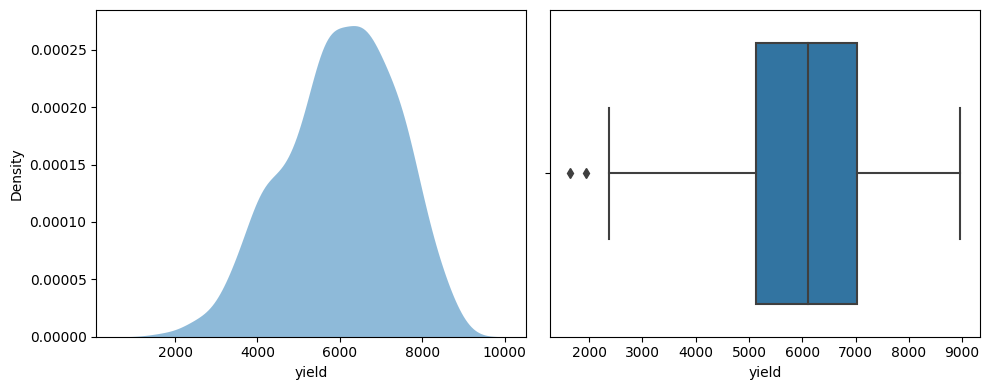

In [46]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(data=train, x='yield', fill=True, common_norm=False, palette="crest",
            alpha=.5, linewidth=0,)

plt.subplot(1,2,2)
sns.boxplot(data=train, x='yield')

plt.tight_layout()

In [32]:
cols_to_analyze = [col for col in train.columns if col not in 'Row#' and col not in 'yield']
print(len(cols_to_analyze), cols_to_analyze)

16 ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']


#### check distribution of all featuress

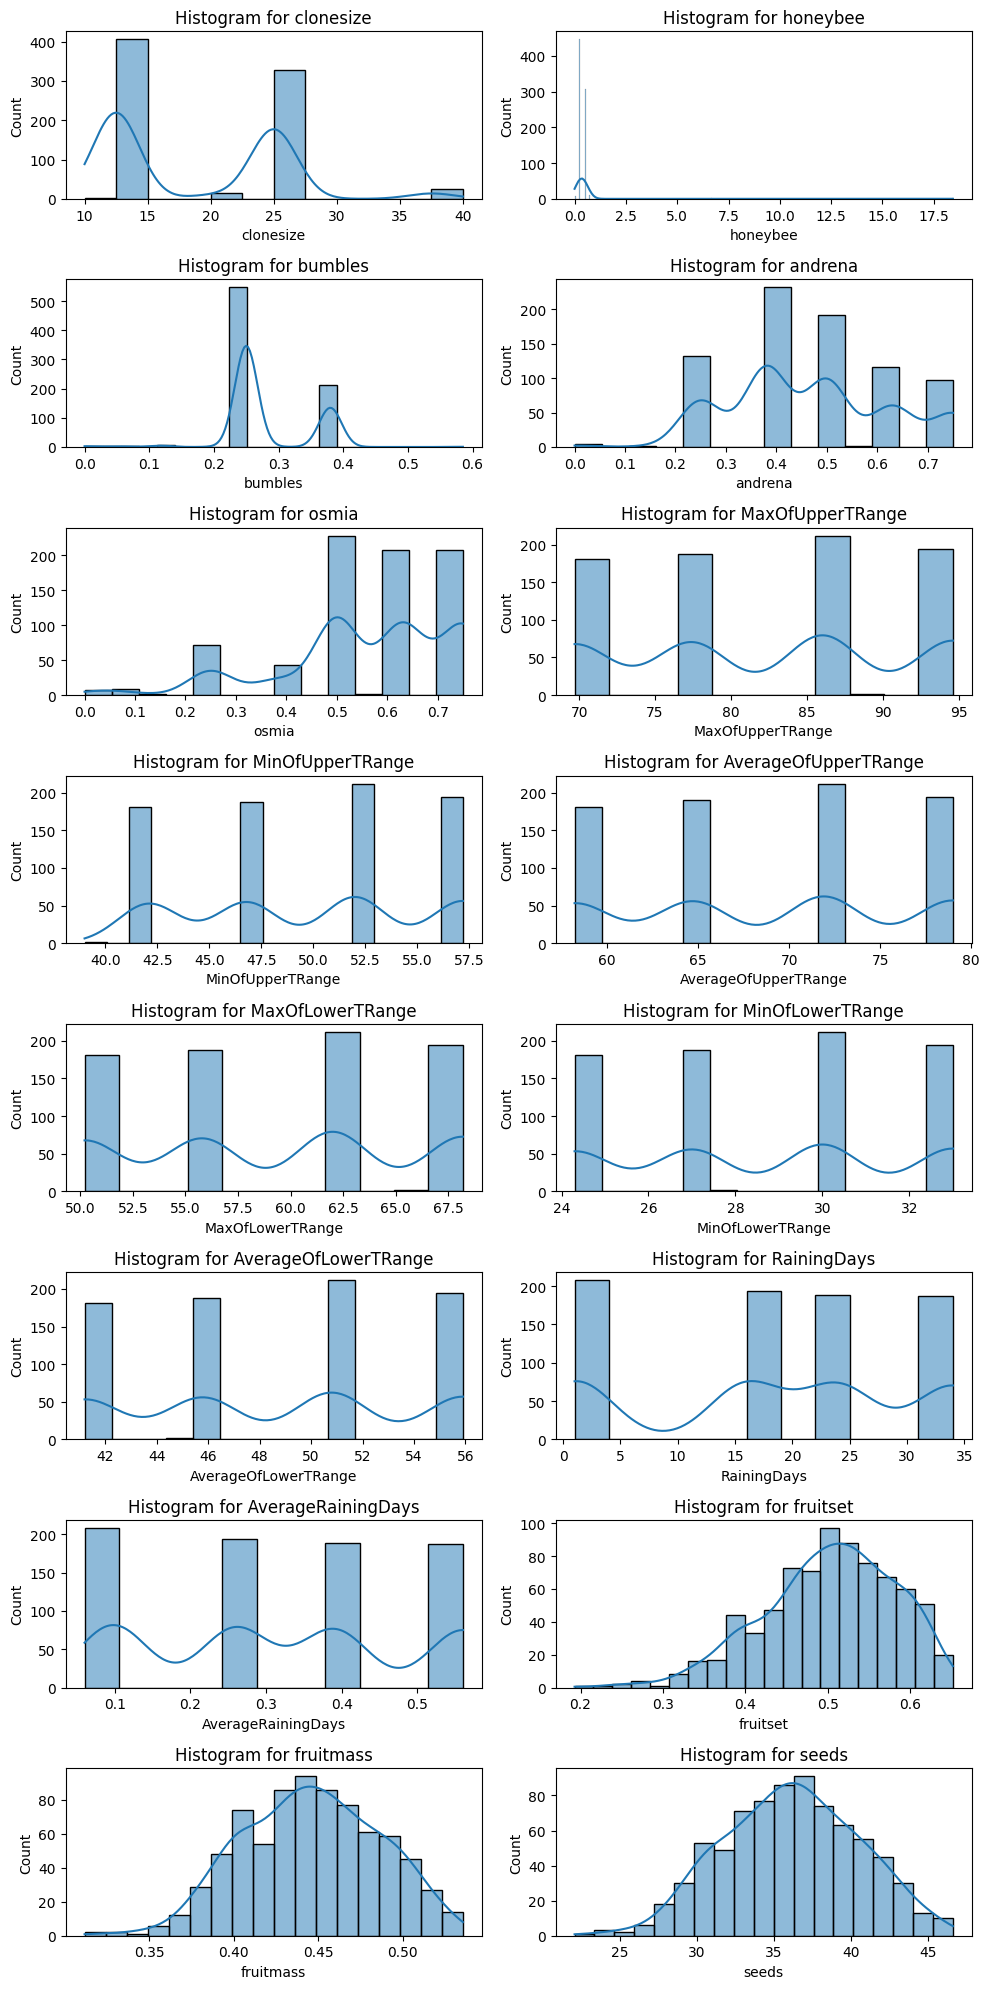

In [39]:
plt.figure(figsize=(10,20))
plotnumber = 1

for col in cols_to_analyze:
    ax1 = plt.subplot(8,2,plotnumber)
    #print(col)
    #plt.figure(figsize=(4,4))
    sns.histplot(data=train, x=col, kde=True, palette='Dark2')
    plt.title(f"Histogram for {col}")
    plotnumber += 1

plt.tight_layout()

#### Check for outliers in features

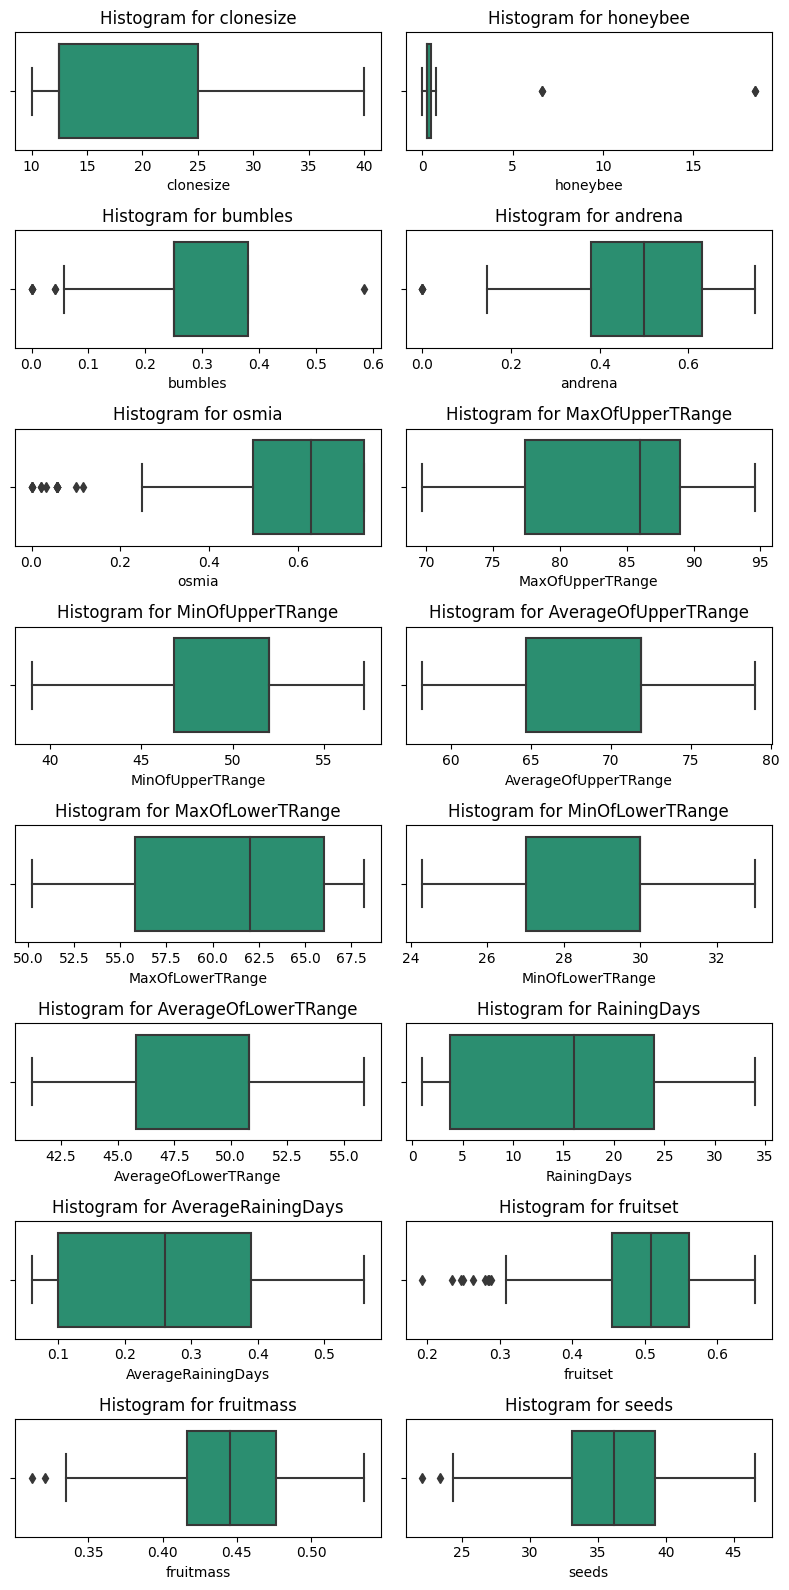

In [52]:
plt.figure(figsize=(8,16))
plotnumber = 1

for col in cols_to_analyze:
    ax1 = plt.subplot(8,2,plotnumber)
    #print(col)
    #plt.figure(figsize=(4,4))
    sns.boxplot(data=train, x=col, palette='Dark2')
    plt.title(f"Histogram for {col}")
    plotnumber += 1

plt.tight_layout()

#### Multivariate analysis

<AxesSubplot: >

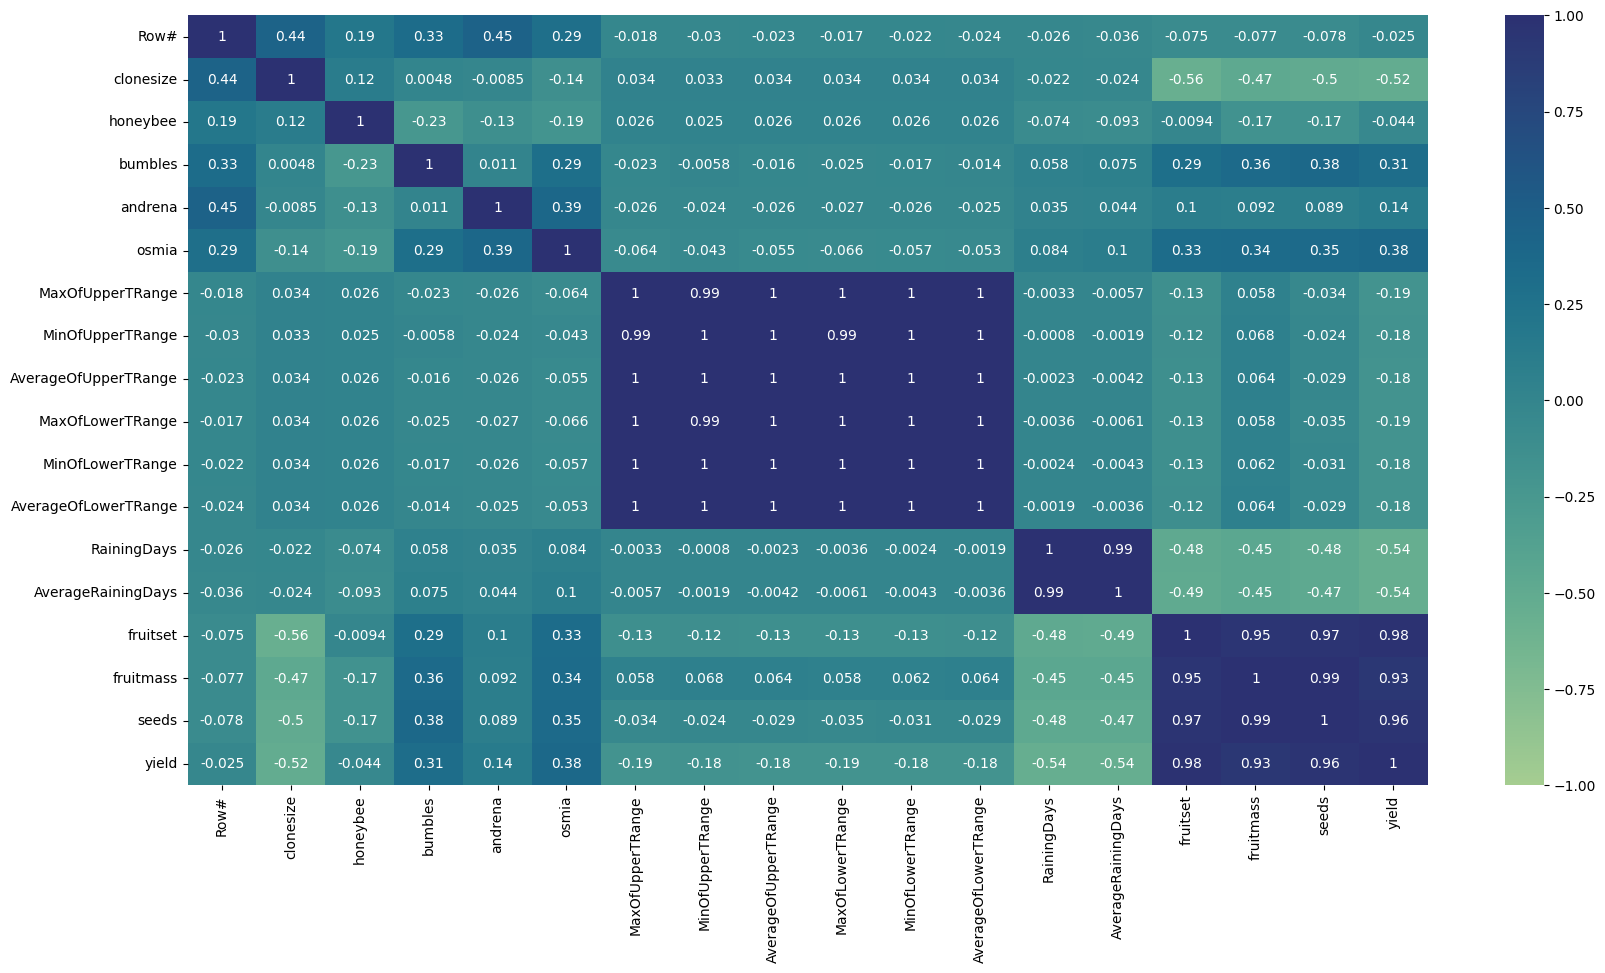

In [57]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap='crest')

* Indepdendent & Dependent features

In [62]:
X = train.drop('yield', axis=1)
Y = train['yield']

print(X.shape, Y.shape)

(777, 17) (777,)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1702)
print(f"Shape of X_train {X_train.shape} & y_train {y_train.shape}")
print(f"Shape of X_train {X_test.shape} & y_train {y_test.shape}")

Shape of X_train (621, 17) & y_train (621,)
Shape of X_train (156, 17) & y_train (156,)


* Standardize the features

In [64]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)

X_test_std = sc.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns)

#### Function to fit model & report metrics

In [122]:
from xgboost import XGBRegressor


def fitmodel(dtrain, y_train, dtest, y_test, features, **kwargs):
    
    if 'linear' in kwargs.keys() and kwargs['linear']:
        print('\n')
        print('Linear Regression')
        lr = LinearRegression()
        lr.fit(dtrain[features], y_train)
        y_pred = lr.predict(dtest[features])
        
        print(f"Train R2 score: {r2_score(y_train, lr.predict(dtrain[features]))}")
        print(f"Test  R2 score: {r2_score(y_test, y_pred)}")
        
        print(f"Test MAE  : {mean_absolute_error(y_test, y_pred)}")
        print(f"Test MSE  : {mean_squared_error(y_test, y_pred)}")
        print(f"Test RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
        
        fig = plt.figure(figsize=(4,4))
        ax1 = fig.add_subplot(1,1,1)
        ax1.scatter(y_test, y_pred, color=['red'])
        #ax1.scatter(train['Row#'], y_pred, c='r')
        plt.show()
        
        lr = LinearRegression()
        cv = cross_val_score(lr, dtrain[features], y_train, cv=3, scoring='r2')
        print('cross validation scores {}'.format(cv))
        print(f'Cross validation avergae score {np.mean(cv)}')
        
   
        
    if 'rf' in kwargs.keys() and kwargs['rf']:
        print('\n')
        print('Random Forest')
        
        rf = RandomForestRegressor()
        rf.fit(dtrain[features], y_train)
        y_pred = rf.predict(dtest[features])
        
        print(f"Train R2 score: {r2_score(y_train, rf.predict(dtrain[features]))}")
        print(f"Test  R2 score: {r2_score(y_test, y_pred)}")
        
        print(f"Test MAE  : {mean_absolute_error(y_test, y_pred)}")
        print(f"Test MSE  : {mean_squared_error(y_test, y_pred)}")
        print(f"Test RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
        
        importances = rf.feature_importances_
        
        
        forest_importances = pd.Series(importances, index=features)
        std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
        
        fig, ax = plt.subplots()
        forest_importances.plot.bar(yerr=std, ax=ax)
        ax.set_title("Feature importances using MDI")
        ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()
        
        rf = RandomForestRegressor()
        cv = cross_val_score(rf, dtrain[features], y_train, cv=3, scoring='r2')
        print('cross validation scores {}'.format(cv))
        print(f'Cross validation avergae score {np.mean(cv)}')

    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        print('\n')
        print('XGB')
        
        xgb = XGBRegressor()
        xgb.fit(dtrain[features], y_train)
        y_pred = xgb.predict(dtest[features])
        
        print(f"Train R2 score: {r2_score(y_train, xgb.predict(dtrain[features]))}")
        print(f"Test  R2 score: {r2_score(y_test, y_pred)}")
        
        print(f"Test MAE  : {mean_absolute_error(y_test, y_pred)}")
        print(f"Test MSE  : {mean_squared_error(y_test, y_pred)}")
        print(f"Test RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
        
        xgb = XGBRegressor()
        cv = cross_val_score(xgb, dtrain[features], y_train, cv=3, scoring='r2')
        print('cross validation scores {}'.format(cv))
        print(f'Cross validation avergae score {np.mean(cv)}')

    if 'gbm' in kwargs.keys() and kwargs['gbm']:
        print('\n')
        print('GBM')
        
        gbm = GradientBoostingRegressor()
        gbm.fit(dtrain[features], y_train)
        y_pred = gbm.predict(dtest[features])
        
        print(f"Train R2 score: {r2_score(y_train, gbm.predict(dtrain[features]))}")
        print(f"Test  R2 score: {r2_score(y_test, y_pred)}")
        
        print(f"Test MAE  : {mean_absolute_error(y_test, y_pred)}")
        print(f"Test MSE  : {mean_squared_error(y_test, y_pred)}")
        print(f"Test RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
        
        gbm = GradientBoostingRegressor()
        cv = cross_val_score(gbm, dtrain[features], y_train, cv=3, scoring='r2')
        print('cross validation scores {}'.format(cv))
        print(f'Cross validation avergae score {np.mean(cv)}')


* Benchmark model - Linear regression using standardized features (all features)

In [90]:
feats = [col for col in train.columns if col not in 'Row#' and col not in 'yield']
feats

['clonesize',
 'honeybee',
 'bumbles',
 'andrena',
 'osmia',
 'MaxOfUpperTRange',
 'MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange',
 'RainingDays',
 'AverageRainingDays',
 'fruitset',
 'fruitmass',
 'seeds']

# Linear Model

* With Raw features

Train R2 score: 0.9916252602047659
Test  R2 score: 0.99207257605292
Test MAE  : 91.95731767401634
Test MSE  : 14070.748623386398
Test RMSE : 118.62018640765322


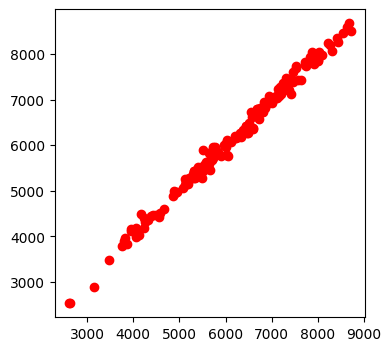

cross validation scores [ 9.89736767e-01 -1.23451641e+20  9.90288717e-01]
Cross validation avergae score -4.115054703518378e+19


In [119]:
fitmodel(X_train, y_train, X_test, y_test, feats, linear=True)

* With standardized features

In [92]:
fitmodel(X_train_std, y_train, X_test_std, y_test, feats, linear=True)

Train R2 score: 0.9916252602047659
Test  R2 score: 0.9920725760529201
Test MAE  : 91.95731767401575
Test MSE  : 14070.748623386271
Test RMSE : 118.62018640765268
cross validation scores [0.98973677 0.66562735 0.99031513]
Cross validation avergae score 0.881893083543332


* Using conventional one-hold method, No difference seen between raw & standardized features
* but during 3 fold cross validation, one chunk of data is resulting in low r2 score (66%) with standardized features whereas with raw features it's R2 has dropped tremendously

# Random Forest model



Random Forest
Train R2 score: 0.998254225404026
Test  R2 score: 0.9873015429183385
Test MAE  : 112.95904804320497
Test MSE  : 22539.07431893225
Test RMSE : 150.13019123058575
cross validation scores [0.978358   0.98836759 0.98348633]
Cross validation avergae score 0.9834039746526111


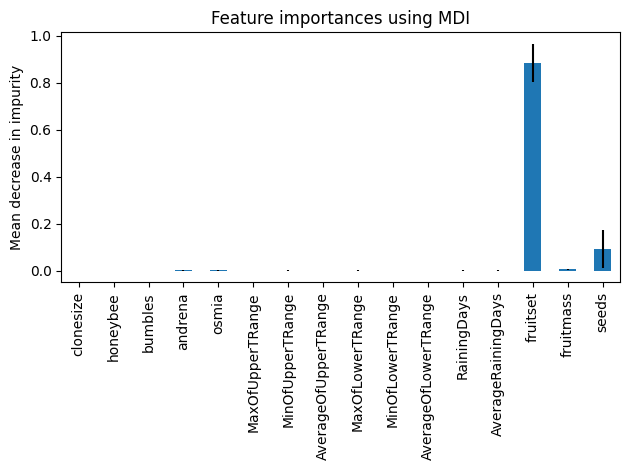

In [123]:
fitmodel(X_train, y_train, X_test, y_test, feats, rf=True)

* Compared to Linear model, Random forest model consistently shows good accuract in all three partitions of data
* overall r2 is 98.3%
* Feature fruit set contributes more than 80% towards prediction

# Extreme Gradient Boosting

In [97]:
fitmodel(X_train, y_train, X_test, y_test, feats, xgb=True)

Train R2 score: 0.9999403734459026
Test  R2 score: 0.9884071866715698
Test MAE  : 108.88030315504805
Test MSE  : 20576.616473535334
Test RMSE : 143.4455174396723
cross validation scores [0.98078819 0.98393527 0.98437182]
Cross validation avergae score 0.9830317625989821


# GradientBoostingRegressor

In [99]:
fitmodel(X_train, y_train, X_test, y_test, feats, gbm=True)

Train R2 score: 0.9961620082930107
Test  R2 score: 0.9895037988605908
Test MAE  : 102.86980299660824
Test MSE  : 18630.189165993565
Test RMSE : 136.49245094873768
cross validation scores [0.98357845 0.99026321 0.98801385]
Cross validation avergae score 0.9872851696104269


* Average CV score for GBM is 98.7% and it is relatively more than other baseline models

* Remove the outliers and apply the model

In [126]:
train.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [131]:
z = np.abs(stats.zscore(train.drop(['Row#', 'yield'], axis=1)))

In [141]:
train_filtered = train[(z < 3).all(axis=1)]

After applying the Z score and filtering the records more than value 3 as outlier, we have just few records filtered(17 records). <br>
WIll not make big difference

Repeat the above steps with outlier removed data

In [142]:
X = train_filtered.drop('yield', axis=1)
Y = train_filtered['yield']

print(X.shape, Y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1702)
print(f"Shape of X_train {X_train.shape} & y_train {y_train.shape}")
print(f"Shape of X_train {X_test.shape} & y_train {y_test.shape}")


sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)

X_test_std = sc.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns)

(764, 17) (764,)
Shape of X_train (611, 17) & y_train (611,)
Shape of X_train (153, 17) & y_train (153,)


Linear Model



Linear Regression
Train R2 score: 0.9919785324955844
Test  R2 score: 0.9921717067527955
Test MAE  : 93.2798111641201
Test MSE  : 13631.231330964361
Test RMSE : 116.75286433730165


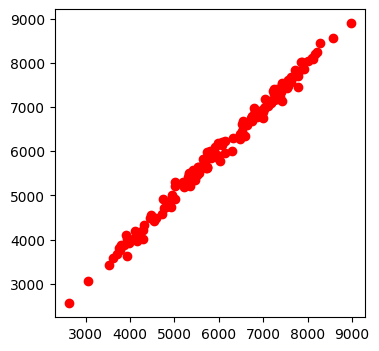

cross validation scores [0.91300498 0.99256417 0.98824532]
Cross validation avergae score 0.9646048241304236


In [143]:
fitmodel(X_train_std, y_train, X_test_std, y_test, feats, linear=True)

* One chunk of data has 65% accuracy with train data having outliers
* After removal of outliers, linear reg model accuracy has improved well to 96.4% from 88%

Random FOrest Model



Random Forest
Train R2 score: 0.9984193945570164
Test  R2 score: 0.9876331385219079
Test MAE  : 119.26594391039234
Test MSE  : 21534.138326520108
Test RMSE : 146.74514753994458
cross validation scores [0.98628642 0.98829055 0.98297604]
Cross validation avergae score 0.9858510029383624


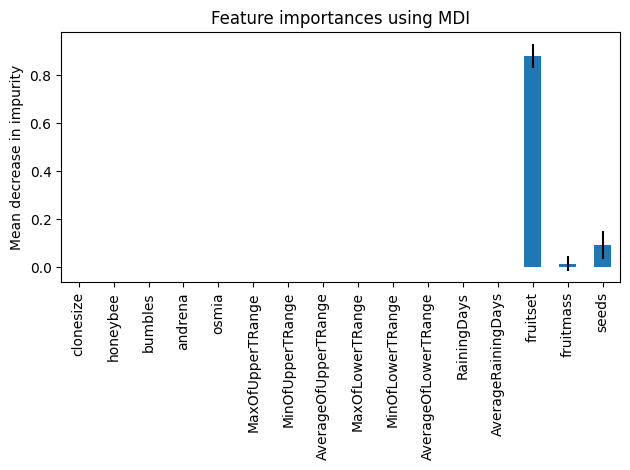

In [144]:
fitmodel(X_train, y_train, X_test, y_test, feats, rf=True)

* Slight improvement seen from 98.3% to 98.5%

Extreme Gradient Boosting

In [145]:
fitmodel(X_train, y_train, X_test, y_test, feats, xgb=True)



XGB
Train R2 score: 0.99993422639755
Test  R2 score: 0.9877984106559187
Test MAE  : 117.58839847937092
Test MSE  : 21246.35366898097
Test RMSE : 145.7612900223546
cross validation scores [0.98508849 0.9900354  0.98581349]
Cross validation avergae score 0.9869791277898701


* Slight increase in model R2 from 98.3% to 98.6%

Gradient Boosting Machine

In [146]:
fitmodel(X_train, y_train, X_test, y_test, feats, gbm=True)



GBM
Train R2 score: 0.9961170636296925
Test  R2 score: 0.9896646507124502
Test MAE  : 106.47741819195306
Test MSE  : 17996.711744953816
Test RMSE : 134.15182348724827
cross validation scores [0.98892567 0.99191636 0.98676152]
Cross validation avergae score 0.9892011813523386


* Slight imporvement from 98.7% to 98.9%

##### Lets try selectKfeatures

In [180]:
def select_features_based_on_corr(X_train, y_train, X_test, x='all'):
    
    if type(x) == 'str':
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k=x)
        
    fs_corr.fit(X_train, y_train)
    
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr


def select_features_based_on_infogain(X_train, y_train, X_test, x='all'):
    
    if type(x) == 'str':
        fs_corr = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=mutual_info_regression, k=x)
        
    fs_corr.fit(X_train, y_train)
    
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr
        
        

In [159]:
X_train_fs, X_test_fs, fs_corr = select_features_based_on_corr(X_train.drop('Row#', axis=1), y_train, X_test.drop('Row#', axis=1))

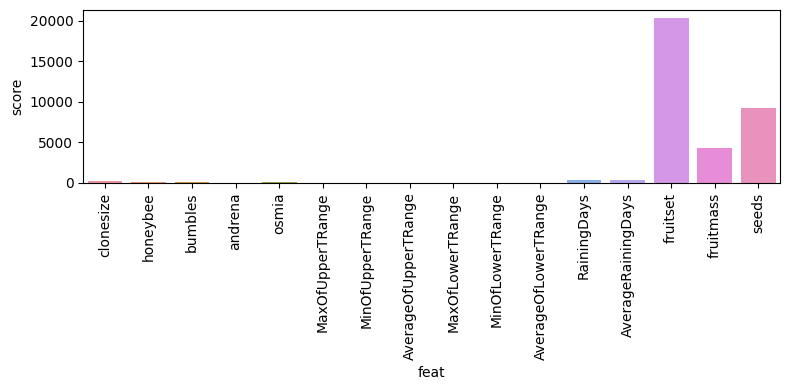

In [178]:
fs_df = pd.DataFrame(zip(list(X_train.drop('Row#', axis=1).columns), fs_corr.scores_), columns=['feat', 'score'])
plt.figure(figsize=(8,4))
sns.barplot(data=fs_df, x='feat', y='score')
plt.xticks(rotation=90)
plt.tight_layout()


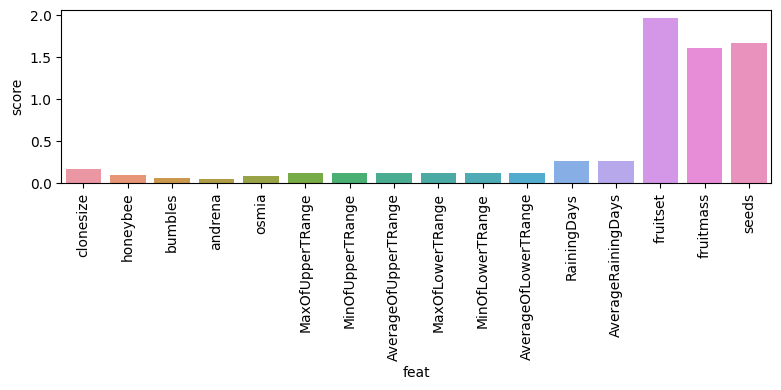

In [181]:
X_train_fs, X_test_fs, fs_corr = select_features_based_on_infogain(X_train.drop('Row#', axis=1), y_train, X_test.drop('Row#', axis=1))
fs_df = pd.DataFrame(zip(list(X_train.drop('Row#', axis=1).columns), fs_corr.scores_), columns=['feat', 'score'])
plt.figure(figsize=(8,4))
sns.barplot(data=fs_df, x='feat', y='score')
plt.xticks(rotation=90)
plt.tight_layout()


Select few important features based on information gain and repeat the modelling

In [184]:
selected_features = ['fruitset', 'fruitmass', 'seeds', 'AverageRainingDays', 'clonesize']



Linear Regression
Train R2 score: 0.9856238966705929
Test  R2 score: 0.9875437855617349
Test MAE  : 115.93633782317663
Test MSE  : 21689.72663060649
Test RMSE : 147.2743244106266


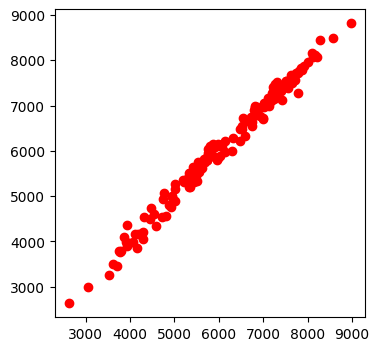

cross validation scores [0.98811481 0.98693995 0.98043782]
Cross validation avergae score 0.98516419459793


In [185]:
#Linear Model
fitmodel(X_train_std, y_train, X_test_std, y_test, selected_features, linear=True)

* Selected features has really helped the linear regression model to improve its accuracy



Random Forest
Train R2 score: 0.9979755978946715
Test  R2 score: 0.986108438867452
Test MAE  : 126.99872867156898
Test MSE  : 24189.06361404051
Test RMSE : 155.52833701303604
cross validation scores [0.98425146 0.98498586 0.97985199]
Cross validation avergae score 0.9830297689927582


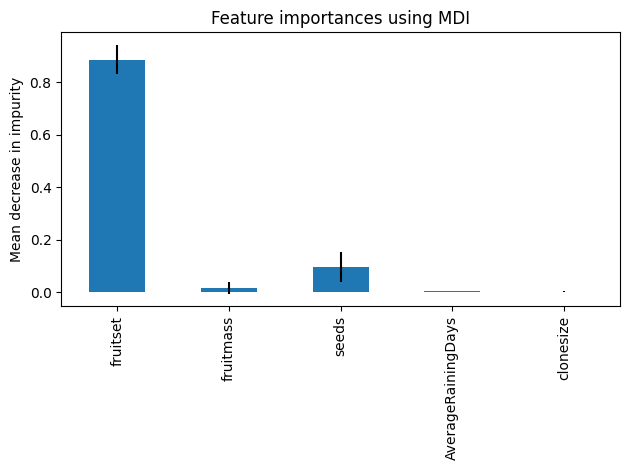

In [186]:
# Random Forest Model
fitmodel(X_train, y_train, X_test, y_test, selected_features, rf=True)

Not have helped RF so much.  <br>
R2 decreased from 98.5 to 98.3

In [187]:
# XGB
fitmodel(X_train, y_train, X_test, y_test, selected_features, xgb=True)



XGB
Train R2 score: 0.9997457065060379
Test  R2 score: 0.9850341039872078
Test MAE  : 128.62983531648283
Test MSE  : 26059.7788283388
Test RMSE : 161.4304148180844
cross validation scores [0.98338917 0.98356474 0.97933551]
Cross validation avergae score 0.9820964736473932


In [188]:
#GBM
fitmodel(X_train, y_train, X_test, y_test, selected_features, gbm=True)



GBM
Train R2 score: 0.9938520554778503
Test  R2 score: 0.9861809251646959
Test MAE  : 125.3371344229119
Test MSE  : 24062.84485155248
Test RMSE : 155.12203212810383
cross validation scores [0.98534209 0.98653802 0.97910045]
Cross validation avergae score 0.9836601867265292


* Selected feature techniques has imporved the linear model but not the other tree/ensembled models
* Certain information to make split are getting missed when we reduce the columns

##### GBM with all features after removing outliers is doing fairly well with 98.9 (R2)